<a href="https://colab.research.google.com/github/alextbradley/IceSheetModellingIntro/blob/main/ice_sheet_modelling_intro_lecture2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-06-04 09:04:24 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
using Pkg
Pkg.add(url = "https://github.com/RJArthern/WAVI.jl")
Pkg.add("Plots")
Pkg.add("Downloads")
using WAVI, Plots, Downloads

     Cloning git-repo `https://github.com/RJArthern/WAVI.jl`
    Updating git-repo `https://github.com/RJArthern/WAVI.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed RegistryInstances ──────────────── v0.1.0
   Installed libfdk_aac_jll ─────────────────── v2.0.2+0
   Installed JpegTurbo_jll ──────────────────── v3.0.3+0
   Installed x265_jll ───────────────────────── v3.5.0+0
   Installed Calculus ───────────────────────── v0.5.1
   Installed TiledIteration ─────────────────── v0.5.0
   Installed OffsetArrays ───────────────────── v1.14.0
   Installed LRUCache ───────────────────────── v1.6.1
   Installed LERC_jll ───────────────────────── v3.0.0+1
   Installed GR_jll ─────────────────────────── v0.73.5+0
   Installed Libmount_jll ───────────────────── v2.40.1+0
   Installed StatsFuns ──────────────────────── v1.3.1
   Installed HypergeometricFunctions ────────── v0.3.23
   Installed FFTW ───────────────────────────── v1.8.0

LoadError: UndefVarError: Plots not defined

In [ ]:
Pkg.add("Plots")
Pkg.add("Downloads")
using WAVI, Plots, Downloads

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [91a5bcdd] + Plots v1.40.4
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f43a241f] + Downloads v1.6.0
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
nx = 164        #number of x grid points
ny = 192        #number of y grid pointd
nσ = 12         #number of sigma grid points
x0 = -1802500.0 #origin of the grid in x
y0 = -847500.0  #origin of the grid in y
dx = 5000.0     #grid resolution in x
dy = 5000.0     #grid resolution in y

5000.0

In [ ]:
h_mask=Array{Float64}(undef,nx,ny); #initialize mask array
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_h_mask_clip_BedmachineV3.bin"),h_mask); #download the file and populate the h_mask array (can ignore the filename)
hm = ntoh.(h_mask); #set to big endian
hm = map.(Bool, round.(Int, hm)); #map everything to a boolean

u_iszero=Array{Float64}(undef,nx+1,ny);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_uiszero_clip_BedmachineV3.bin"),u_iszero);
u_iszero.=ntoh.(u_iszero);
u_iszero = map.(Bool, round.(Int, u_iszero));

v_iszero=Array{Float64}(undef,nx,ny+1);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_viszero_clip_BedmachineV3.bin"),v_iszero);
v_iszero.=ntoh.(v_iszero);
v_iszero = map.(Bool, round.(Int, v_iszero));

In [ ]:
grid = Grid(nx = nx, ny = ny, nσ = nσ, x0 = x0, y0 = y0, dx = dx, dy = dy, h_mask = hm, u_iszero = u_iszero, v_iszero = v_iszero)
Plots.spy(hm)

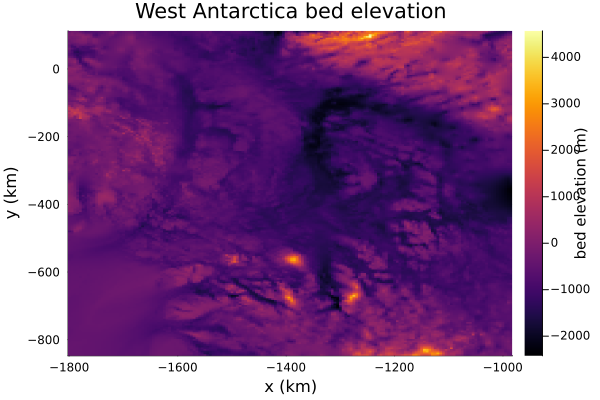

In [ ]:
bed=Array{Float64}(undef,nx,ny);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_bed_clip_noNan_BedmachineV3.bin"),bed);
bed.=ntoh.(bed)

plt = Plots.heatmap(grid.xxh[:,1]/1e3, grid.yyh[1,:]/1e3, bed',
                    xlabel = "x (km)",
                    ylabel = "y (km)",
                    colorbar_title = "bed elevation (m)",
                    title = "West Antarctica bed elevation",
                    framestyle = "box")

In [ ]:
temp=Array{Float64}(undef,nx,ny,nσ);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_3Dtemp_clip_noNan_BedmachineV3.bin"),temp)
temp.=ntoh.(temp)

damage=Array{Float64}(undef,nx,ny,nσ);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_damage3D_clip_noNan_BedmachineV3.bin"),damage)
damage.=ntoh.(damage)

h=Array{Float64}(undef,nx,ny);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_thickness_clip_noNan_BedmachineV3.bin"),h);
h.=ntoh.(h)

viscosity=Array{Float64}(undef,nx,ny,nσ);
read!(Downloads.download("https://github.com/alextbradley/WAVI_example_data/raw/main/WAIS/Inverse_5km_viscosity3D_clip_noNan_BedmachineV3.bin"),viscosity)
viscosity.=ntoh.(viscosity);

initial_conditions = InitialConditions(initial_thickness = h,initial_viscosity = viscosity,initial_temperature = temp,initial_damage = damage)

InitialConditions{Float64}
  initial_thickness: Array{Float64}((164, 192)) [0.0 0.0 … 545.1867065429688 824.229736328125; 0.0 0.0 … 586.6956176757812 815.2380981445312; … ; 2028.377197265625 2118.53857421875 … 1936.53173828125 2397.4716796875; 2135.701904296875 2115.607421875 … 1896.1549072265625 2229.5126953125]
  initial_grounded_fraction: Array{Float64}((1, 1)) [NaN;;]
  initial_u_veloc: Array{Float64}((1, 1)) [NaN;;]
  initial_v_veloc: Array{Float64}((1, 1)) [NaN;;]
  initial_viscosity: Array{Float64}((164, 192, 12)) [0.0 0.0 … 1.0e7 1.0e7; 0.0 0.0 … 1.0e7 1.0e7; … ; 1.0e7 1.0e7 … 1.0e7 1.0e7; 1.0e7 1.0e7 … 1.0e7 1.0e7;;; 0.0 0.0 … 1.0e7 1.0e7; 0.0 0.0 … 1.0e7 1.0e7; … ; 1.0e7 1.0e7 … 1.0e7 1.0e7; 1.0e7 1.0e7 … 1.0e7 1.0e7;;; 0.0 0.0 … 1.0e7 1.0e7; 0.0 0.0 … 1.0e7 1.0e7; … ; 1.0e7 1.0e7 … 1.0e7 1.0e7; 1.0e7 1.0e7 … 1.0e7 1.0e7;;; … ;;; 0.0 0.0 … 1.0e7 1.0e7; 0.0 0.0 … 1.0e7 1.0e7; … ; 1.0e7 1.0e7 … 1.0e7 1.0e7; 1.0e7 1.0e7 … 1.0e7 1.0e7;;; 0.0 0.0 … 1.0e7 1.0e7; 0.0 0.0 … 1.0e7 1.0

In [ ]:
model = Model(grid = grid, bed_elevation = bed,initial_conditions= initial_conditions)

Model{Float64, Int64, Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, UniformMeltRate{Float64}, BasicParallelSpec}(Grid{Float64, Int64}(164, 192, 12, 5000.0, 5000.0, -1.8025e6, -847500.0, Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], [-1.8e6 -1.8e6 … -1.8e6 -1.8e6; -1.795e6 -1.795e6 … -1.795e6 -1.795e6; … ; -990000.0 -990000.0 … -990000.0 -990000.0; -985000.0 -985000.0 … -985000.0 -985000.0], [-845000.0 -840000.0 … 105000.0 110000.0; -845000.0 -840000.0 … 105000.0 110000.0; … ; -845000.0 -840000.0 … 105000.0 110000.0; -845000.0 -840000.0 … 105000.0 110000.0], [-1.8025e6 -1.8025e6 … -1.8025e6 -1.8025e6; -1.7975e6 -1.7975e6 … -1.7975e6 -1.7975e6; … ; -987500.0 -987500.0 … -987500.0 -987500.0; -982500.0 -982500.0

In [ ]:
update_state!(model)

Solved momentum equation on thread 1 with residual 5.03e-5 at iteration 30


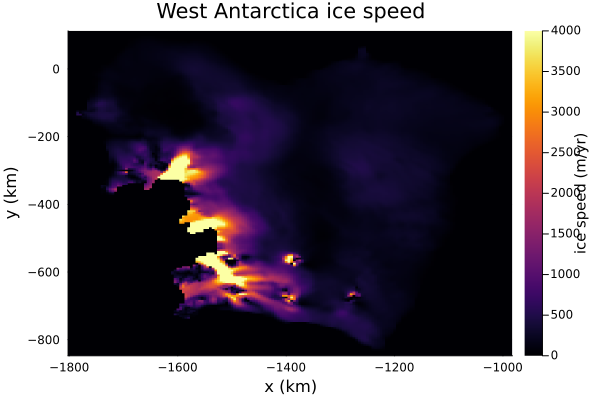

In [ ]:
plt = Plots.heatmap(grid.xxh[:,1]/1e3, grid.yyh[1,:]/1e3, model.fields.gh.av_speed',
                    xlabel = "x (km)",
                    ylabel = "y (km)",
                    colorbar_title = "ice speed (m/yr)",
                    title = "West Antarctica ice speed",
                    framestyle = "box",
                    clim=(0,4000))